In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_images,train_labels) , (test_images,test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_images.shape

(50000, 32, 32, 3)

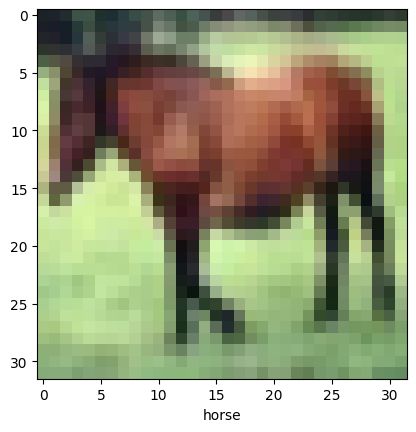

In [5]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX], cmap= plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history = model.fit(train_images,train_labels,epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5404 - accuracy: 0.4382 - val_loss: 1.2702 - val_accuracy: 0.5416
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1659 - accuracy: 0.5873 - val_loss: 1.1214 - val_accuracy: 0.5968
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0108 - accuracy: 0.6468 - val_loss: 1.0053 - val_accuracy: 0.6445
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9130 - accuracy: 0.6827 - val_loss: 0.9442 - val_accuracy: 0.6692
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8384 - accuracy: 0.7082 - val_loss: 0.8882 - val_accuracy: 0.6883
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7859 - accuracy: 0.7283 - val_loss: 0.9207 - val_accuracy: 0.6825
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7357 - accuracy: 0.7456 - val_loss: 0.8479 -

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 2s - loss: 0.8838 - accuracy: 0.7055 - 2s/epoch - 7ms/step
0.7055000066757202


In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


deer


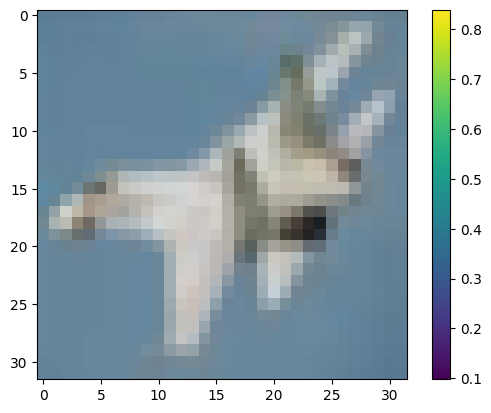

In [13]:
print(class_names[np.argmax(predictions[10])])
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

Working with small datasets

Data Augmentation

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

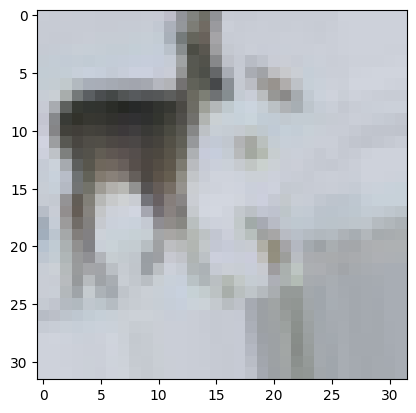

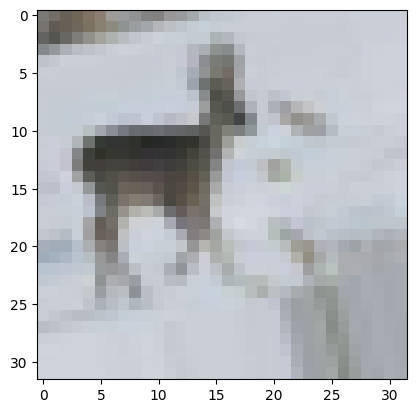

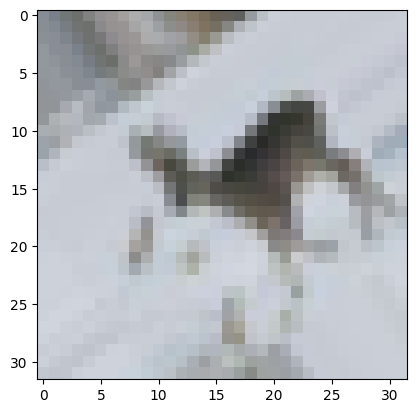

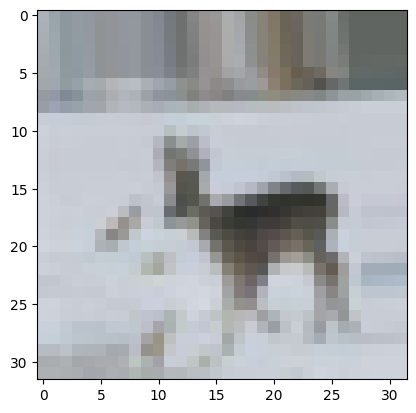

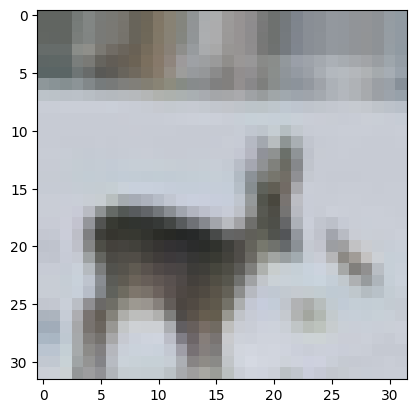

In [15]:
datagen = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

# picking an image to transform

test_img = train_images[20]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test' , save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break
    
    
plt.show()

Pretrained models

In [16]:
import os 
import tensorflow_datasets as tfds

/home/griffith/main/machine_learning/beginning/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
(raw_train,raw_validation,raw_test) , metadata = tfds.load(
    'cats_vs_dogs',
    split= ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info= True,
    as_supervised= True,
)

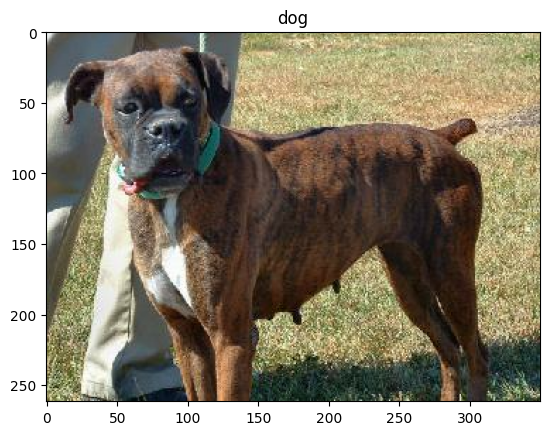

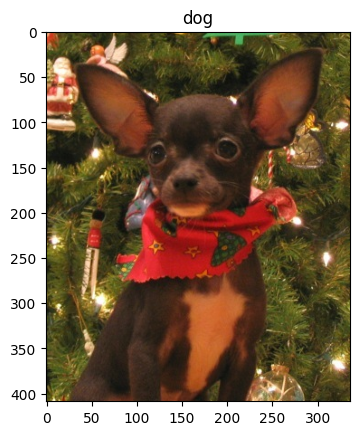

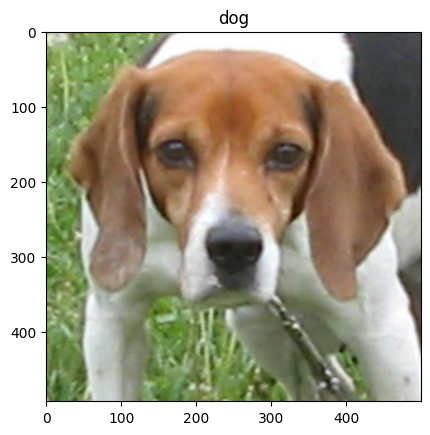

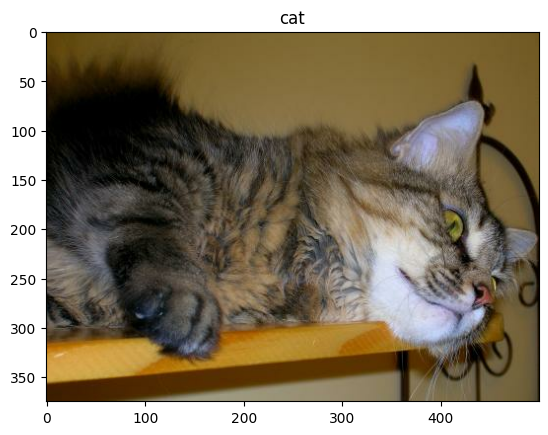

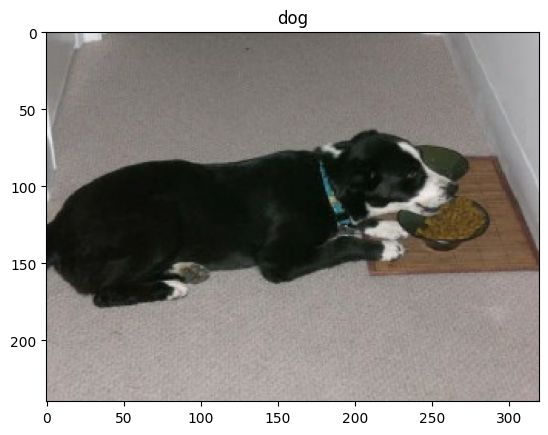

In [18]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [19]:
IMG_SIZE = 160
def format_example(image,label):
    """
    returns an image that is reshaped to IMG_SIZE
    """
    image = tf.cast(image,tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image,label



In [20]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

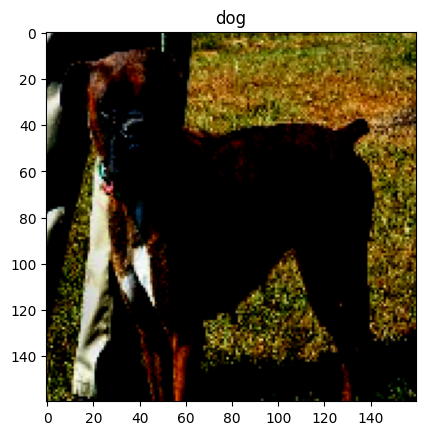

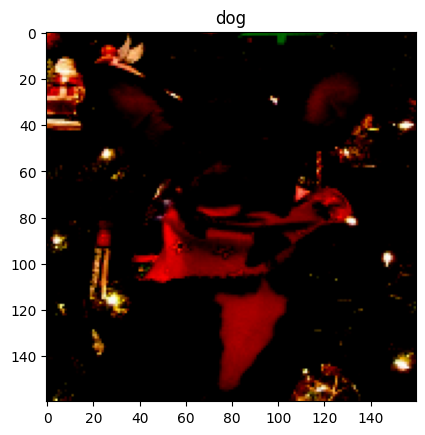

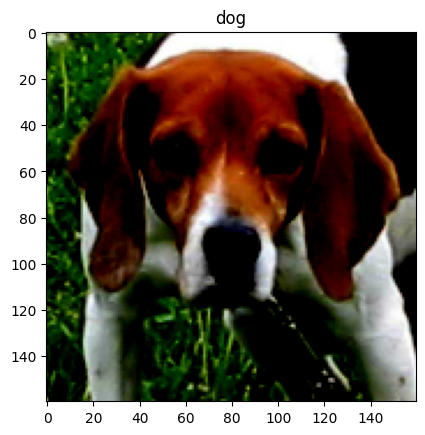

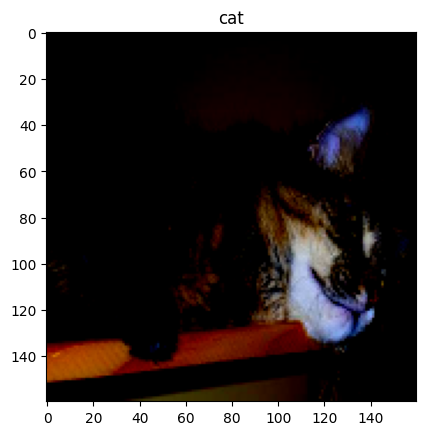

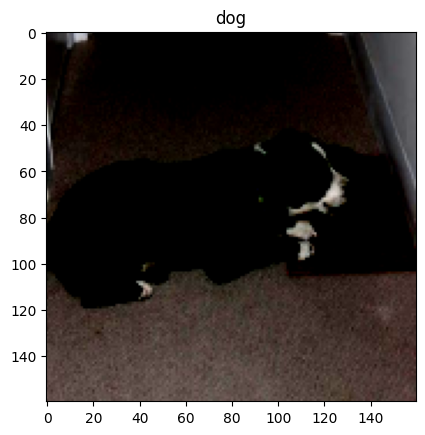

In [21]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [25]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [22]:
for img,label in raw_train.take(2):
    print("original shape: ",img.shape)
    
for img,label in train.take(2):
    print("new Shape:", img.shape)

original shape:  (262, 350, 3)
original shape:  (409, 336, 3)
new Shape: (160, 160, 3)
new Shape: (160, 160, 3)


In [23]:
IMG_SHAPE = (IMG_SIZE,IMG_SIZE, 3)

# create the base model from the pre-trained model MobielNet V2

base_model = keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet"
)

In [24]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [28]:
for image,_ in train_batches.take(1):
  
    feature_batch = base_model(image)
    print(feature_batch.shape)

(32, 5, 5, 1280)


In [29]:
base_model.trainable = False

In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [31]:
global_average_layer = keras.layers.GlobalAveragePooling2D()

In [32]:
prediction_layer = keras.layers.Dense(1)

In [33]:
model = keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
base_learning_rate = 0.0001
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate = base_learning_rate),
    loss= keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

In [37]:
initial_epochs = 3
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches,steps= validation_steps)

 4/20 [=====>........................] - ETA: 3s - loss: 0.7153 - accuracy: 0.5391

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


15/20 [=====================>........] - ETA: 1s - loss: 0.6742 - accuracy: 0.5521

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


20/20 [==============================] - 8s 223ms/step - loss: 0.6560 - accuracy: 0.5625


In [38]:
history = model.fit(
    train_batches,
    epochs= initial_epochs,
    validation_data= validation_batches,
    
)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
163/582 [=======>......................] - ETA: 1:44 - loss: 0.3565 - accuracy: 0.8211

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


195/582 [=========>....................] - ETA: 1:36 - loss: 0.3298 - accuracy: 0.8412

206/582 [=========>....................] - ETA: 1:33 - loss: 0.3222 - accuracy: 0.8466

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


277/582 [=============>................] - ETA: 1:19 - loss: 0.2819 - accuracy: 0.8725

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


486/582 [========================>.....] - ETA: 24s - loss: 0.2102 - accuracy: 0.9117

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


499/582 [========================>.....] - ETA: 21s - loss: 0.2068 - accuracy: 0.9133

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


509/582 [=========================>....] - ETA: 18s - loss: 0.2048 - accuracy: 0.9144

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


537/582 [==========================>...] - ETA: 11s - loss: 0.1983 - accuracy: 0.9174

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 9s - loss: 0.1972 - accuracy: 0.9178 

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9214

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 171s 282ms/step - loss: 0.1898 - accuracy: 0.9214 - val_loss: 0.0838 - val_accuracy: 0.9708
Epoch 2/3
164/582 [=======>......................] - ETA: 1:36 - loss: 0.0784 - accuracy: 0.9747

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/582 [=========>....................] - ETA: 1:29 - loss: 0.0780 - accuracy: 0.9746

207/582 [=========>....................] - ETA: 1:26 - loss: 0.0776 - accuracy: 0.9751

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


278/582 [=============>................] - ETA: 1:11 - loss: 0.0791 - accuracy: 0.9732

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


487/582 [========================>.....] - ETA: 23s - loss: 0.0735 - accuracy: 0.9750

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


500/582 [========================>.....] - ETA: 19s - loss: 0.0734 - accuracy: 0.9750

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


511/582 [=========================>....] - ETA: 17s - loss: 0.0731 - accuracy: 0.9751

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


538/582 [==========================>...] - ETA: 10s - loss: 0.0722 - accuracy: 0.9752

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 9s - loss: 0.0720 - accuracy: 0.9754

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9752

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 158s 270ms/step - loss: 0.0715 - accuracy: 0.9752 - val_loss: 0.0619 - val_accuracy: 0.9789
Epoch 3/3
164/582 [=======>......................] - ETA: 1:38 - loss: 0.0610 - accuracy: 0.9788

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/582 [=========>....................] - ETA: 1:30 - loss: 0.0600 - accuracy: 0.9794

207/582 [=========>....................] - ETA: 1:28 - loss: 0.0606 - accuracy: 0.9796

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


279/582 [=============>................] - ETA: 1:11 - loss: 0.0618 - accuracy: 0.9782

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


488/582 [========================>.....] - ETA: 22s - loss: 0.0592 - accuracy: 0.9793

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


500/582 [========================>.....] - ETA: 19s - loss: 0.0592 - accuracy: 0.9793

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


510/582 [=========================>....] - ETA: 16s - loss: 0.0590 - accuracy: 0.9793

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


538/582 [==========================>...] - ETA: 10s - loss: 0.0587 - accuracy: 0.9794

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


544/582 [===========================>..] - ETA: 8s - loss: 0.0583 - accuracy: 0.9795

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0582 - accuracy: 0.9794

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 156s 265ms/step - loss: 0.0582 - accuracy: 0.9794 - val_loss: 0.0548 - val_accuracy: 0.9815
[0.9213863611221313, 0.9751746654510498, 0.9794196486473083]


In [41]:
model.save("data/dogs_vs_cats.keras")
new_model = keras.models.load_model("data/dogs_vs_cats.keras")

In [43]:
prediction = model.predict(test_batches, verbose = 1)


26/73 [=========>....................] - ETA: 11s

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


73/73 [==============================] - 17s 226ms/step
[2.6635363]


In [45]:
print(np.argmax(prediction[1]))

0


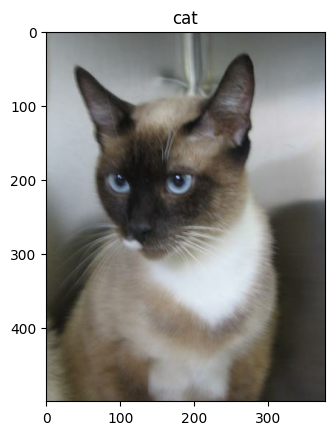

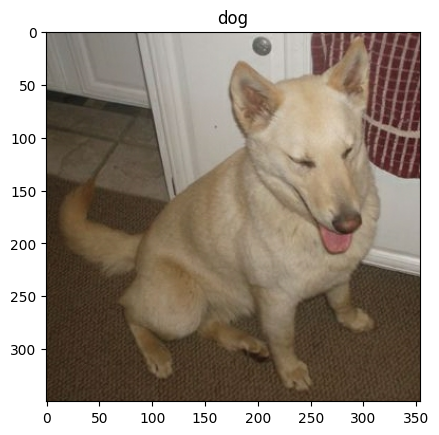

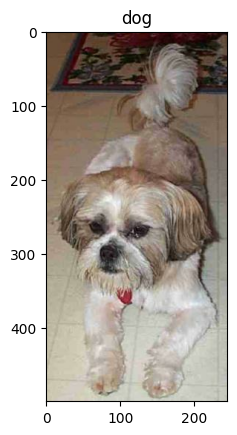

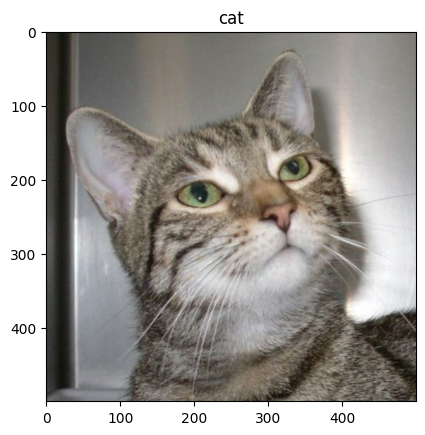

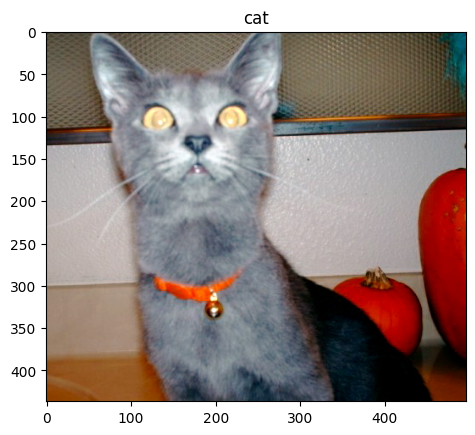

In [58]:
i = 0
for image, _ in raw_test.take(5):
    plt.figure()
    plt.imshow(image)
    if prediction[i] > 0:
        plt.title(get_label_name(1))
    else:
        plt.title(get_label_name(0))
    i += 1